# Capstone 2 - Nuclear feature extraction for breast tumor diagnosis

# Training/ML

In [48]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import datetime

from sklearn import __version__ as sklearn_version
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import scale, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, auc, f1_score, roc_auc_score, roc_curve, get_scorer_names
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression


In [2]:
pd.set_option('display.max_columns', 22)
wdbc_data = pd.read_table('cleaned_data',sep=',')
wdbc_data.head()

,ID,Diagnosis,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_points,symmetry,fractal_dimension,radius_ext,texture_ext,perimeter_ext,area_ext,smoothness_ext,compactness_ext,concavity_ext,concave_points_ext,symmetry_ext,fractal_dimension_ext
0,842302,True,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,True,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,True,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,True,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,True,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
y = wdbc_data['Diagnosis']
X = wdbc_data.drop(['ID','Diagnosis'], axis=1)

In [4]:
y.shape, X.shape

((569,), (569, 20))

In [5]:
# Feature selection for testing (based on RF in EDA)
top_5 = ['concave_points_ext', 'texture_ext', 'concavity', 'texture',
       'radius_ext']
top_10 = ['concave_points_ext', 'texture_ext', 'concavity', 'texture',
       'radius_ext', 'concave_points', 'perimeter_ext', 'smoothness_ext',
       'smoothness', 'symmetry_ext']
top_15 = ['concave_points_ext', 'texture_ext', 'concavity', 'texture',
       'radius_ext', 'concave_points', 'perimeter_ext', 'smoothness_ext',
       'smoothness', 'symmetry_ext', 'area_ext', 'concavity_ext', 'area',
       'perimeter', 'compactness_ext']
all_feat = ['concave_points_ext', 'texture_ext', 'concavity', 'texture',
       'radius_ext', 'concave_points', 'perimeter_ext', 'smoothness_ext',
       'smoothness', 'symmetry_ext', 'area_ext', 'concavity_ext', 'area',
       'perimeter', 'compactness_ext', 'radius', 'fractal_dimension',
       'symmetry', 'compactness', 'fractal_dimension_ext']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y, random_state = 17)

In [7]:
X_train.shape, y_train.shape

((398, 20), (398,))

In [8]:
X_test.shape, y_test.shape

((171, 20), (171,))

In [ ]:
X_train.dtypes, X_test.dtypes # all float

In [9]:
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
init_log = LogisticRegression(max_iter = 1200).fit(X_train, y_train)

In [12]:
init_logpred = init_log.predict(X_train)

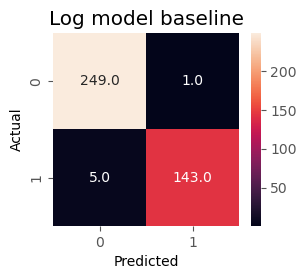

In [13]:
plt.figure(figsize=(3,2.5))
sns.heatmap(confusion_matrix(y_train,init_logpred), annot=True, fmt='.1f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Log model baseline');

In [14]:
# Baseline
round(recall_score(y_train, logpred_train),4)

0.9662

In [ ]:
# baseline recall = .9662

# Log Regression

In [15]:
c_search = np.logspace(-5, 5)
param_grid = {'C': c_search, 'solver': ['lbfgs'],'penalty': ['l2']}

log_reg = LogisticRegression(max_iter = 1200)
log_reg_cv = GridSearchCV(log_reg, param_grid, refit = 'recall', scoring='roc_auc')
log_reg_cv.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=1200),
             param_grid={'C': array([1.00000000e-05, 1.59985872e-05, 2.55954792e-05, 4.09491506e-05,
       6.55128557e-05, 1.04811313e-04, 1.67683294e-04, 2.68269580e-04,
       4.29193426e-04, 6.86648845e-04, 1.09854114e-03, 1.75751062e-03,
       2.81176870e-03, 4.49843267e-03, 7.19685673e-03, 1.15139540e-02,
       1.84206997e-02, 2.94705170e-02,...
       5.17947468e+00, 8.28642773e+00, 1.32571137e+01, 2.12095089e+01,
       3.39322177e+01, 5.42867544e+01, 8.68511374e+01, 1.38949549e+02,
       2.22299648e+02, 3.55648031e+02, 5.68986603e+02, 9.10298178e+02,
       1.45634848e+03, 2.32995181e+03, 3.72759372e+03, 5.96362332e+03,
       9.54095476e+03, 1.52641797e+04, 2.44205309e+04, 3.90693994e+04,
       6.25055193e+04, 1.00000000e+05]),
                         'penalty': ['l2'], 'solver': ['lbfgs']},
             refit='recall', scoring='roc_auc')

In [16]:
log_reg_cv.best_params_

{'C': 0.30888435964774846, 'penalty': 'l2', 'solver': 'lbfgs'}

In [17]:
log_reg_cv.best_score_ # Mean cross-validated score on best params

0.9921839080459769

In [76]:
log_mod = LogisticRegression(max_iter=1000, solver='lbfgs', C=0.30888435964774846,
                             penalty='l2').fit(X_train, y_train)
log_prd = log_mod.predict(X_test)
fp_log,tp_log,th_log = roc_curve(y_test, log_prd)

round(recall_score(y_test, log_prd),5), round(auc(fp_log, tp_log),5)

(0.9375, 0.9594)

In [23]:
print('roc = ', roc_auc_score(y_test, log_prd), '\n'
      'recall = ', recall_score(y_test, log_prd), '\n'
      'precision = ', precision_score(y_test, log_prd), '\n'
      'f1 = ', f1_score(y_test, log_prd))

roc =  0.9594042056074766 
recall =  0.9375 
precision =  0.967741935483871 
f1 =  0.9523809523809523


# Random Forest

In [25]:
# Random Forest
# y_train_rf, y_test_rf = y_train.astype(int), y_test.astype(int)

rf = RandomForestClassifier(n_estimators=1000, random_state=17).fit(X_train, y_train)

In [26]:
rf_pred = rf.predict(X_test)
roc_auc_score(y_test, rf_pred), recall_score(y_test, rf_pred)

(0.946918808411215, 0.921875)

In [28]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(50, 1500, 20)]
max_depth = [int(x) for x in np.linspace(1, 20)]
max_features = [1.0,'sqrt','log2',None]
bootstrap = [True, False]

rfparam_grid = {'n_estimators': n_estimators,
                'max_depth': max_depth,
                'max_features': max_features,
                'bootstrap': bootstrap}

rf_random_cv = RandomizedSearchCV(estimator = rf, param_distributions = rfparam_grid,
                                  n_iter = 40, cv = 3, scoring = 'roc_auc', refit = 'recall',
                                  random_state = 17, n_jobs = -1)
rf_random_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(n_estimators=1000,
                                                    random_state=17),
                   n_iter=40, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [1, 1, 1, 2, 2, 2, 3, 3, 4,
                                                      4, 4, 5, 5, 6, 6, 6, 7, 7,
                                                      7, 8, 8, 9, 9, 9, 10, 10,
                                                      11, 11, 11, 12, ...],
                                        'max_features': [1.0, 'sqrt', 'log2',
                                                         None],
                                        'n_estimators': [50, 126, 202, 278, 355,
                                                         431, 507, 584, 660,
                                                         736, 813, 889, 965,
                                                         1042, 1118, 1194, 1271,
                                                         1347, 1423, 1500]},
                   random_state=17, refit='recall', scoring='roc_auc')

In [29]:
rf_random_cv.best_params_

{'n_estimators': 1118, 'max_features': 1.0, 'max_depth': 9, 'bootstrap': True}

In [30]:
rf_model = RandomForestClassifier(n_estimators=1118, max_features='sqrt', max_depth=14,
                                  bootstrap=True).fit(X_train, y_train)
rfm_pred = rf_model.predict(X_test)

In [31]:
print('roc = ', roc_auc_score(y_test, rfm_pred), '\n'
      'recall = ', recall_score(y_test, rfm_pred), '\n'
      'precision = ', precision_score(y_test, rfm_pred), '\n'
      'f1 = ', f1_score(y_test, rfm_pred))

roc =  0.946918808411215 
recall =  0.921875 
precision =  0.9516129032258065 
f1 =  0.9365079365079365


# ROC curve

In [35]:
rfm_predprob = rf_model.predict_proba(X_test)
log_predprob = log_mod.predict_proba(X_test)

In [106]:
thres_plotlog

array([1.99999999e+00, 9.99999989e-01, 5.97984153e-01, 5.13488622e-01,
       4.12943891e-01, 1.84641160e-01, 1.68297634e-01, 3.07597005e-04])

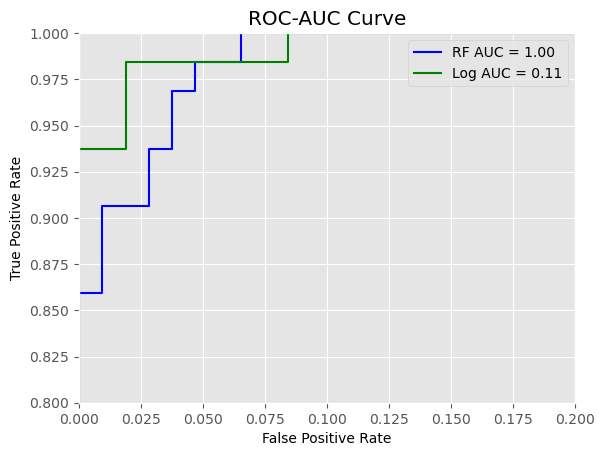

In [80]:
fpr, tpr, thres = roc_curve(y_test, rfm_predprob[:,1])
roc_auc = auc(fpr, tpr)

plt.title('ROC-AUC Curve')
plt.plot(fpr, tpr, 'b', label = 'RF AUC = %0.2f' % roc_auc)

fp_plotlog, tp_plotlog, thres_plotlog = roc_curve(y_test, log_predprob[:,1])
roc_auc = auc(fp_plotlog, thres_plotlog)

plt.title('ROC-AUC Curve')
plt.plot(fp_plotlog, tp_plotlog, 'g', label = 'Log AUC = %0.2f' % roc_auc)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, .2])
plt.ylim([.8, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show();

In [55]:
log_classreport_dict = classification_report(y_test, log_prd, output_dict=True)
log_classreport = pd.DataFrame(log_classreport_dict)
log_classreport

,False,True,accuracy,macro avg,weighted avg
precision,0.963303,0.967742,0.964912,0.965522,0.964964
recall,0.981308,0.937500,0.964912,0.959404,0.964912
f1-score,0.972222,0.952381,0.964912,0.962302,0.964796
support,107.000000,64.000000,0.964912,171.000000,171.000000


# Precision-recall curve

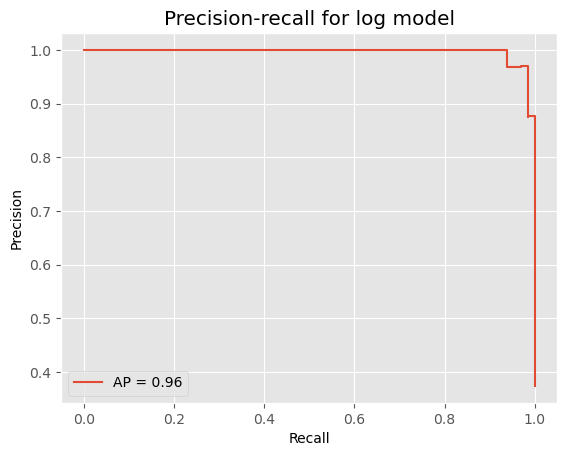

In [58]:
from sklearn.metrics import PrecisionRecallDisplay, precision_recall_curve

precis, recal, _ = precision_recall_curve(y_test, log_predprob[:, 1])
PrecisionRecallDisplay(precision=precis, recall=recal, average_precision = .965).plot()
plt.title('Precision-recall for log model')
plt.show()

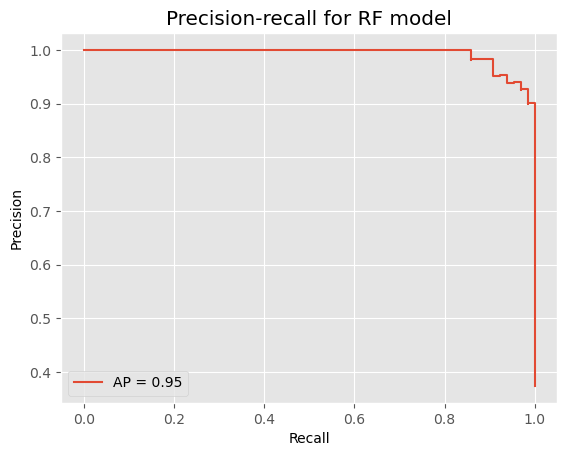

In [60]:
precisrf, recalrf, __ = precision_recall_curve(y_test, rfm_predprob[:, 1])
PrecisionRecallDisplay(precision=precisrf, recall=recalrf, average_precision = .9532).plot()
plt.title('Precision-recall for RF model')
plt.show()

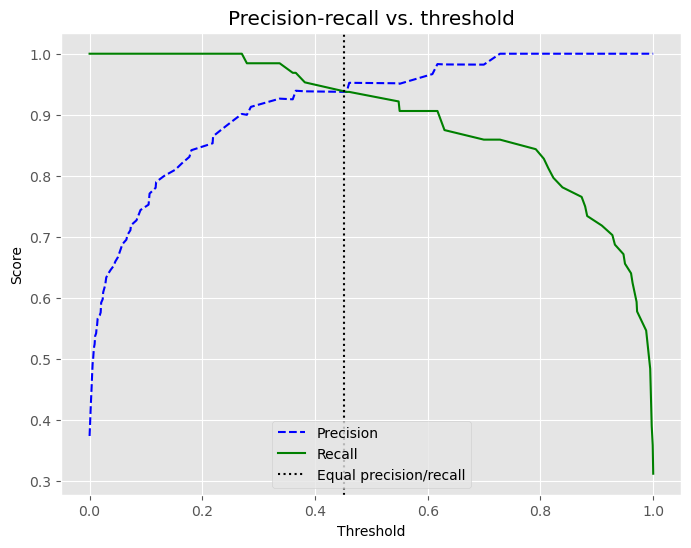

In [105]:
# rfm_predprob = rf_model.predict_proba(X_test)
# fpr, tpr, thres = roc_curve(y_test, rfm_predprob[:,1])

prc_p, prc_r, prc_t = precision_recall_curve(y_test, rfm_predprob[:,1])

plt.figure(figsize = (8, 6))
plt.title('Precision-recall vs. threshold')
plt.plot(prc_t, prc_p[:-1], 'b--', label = 'Precision')
plt.plot(prc_t, prc_r[:-1], 'green', label = 'Recall')
plt.axvline(x = .452, color = 'black', linestyle = ':', label = 'Equal precision/recall')
plt.ylabel('Score')
plt.xlabel('Threshold')
plt.legend(loc = 'best')

In [75]:
rf_feat_imp = pd.DataFrame(rf_model.feature_importances_, all_feat)
rf_feat_imp.sort_values(by=0, ascending=False)

,0
area,0.162249
area_ext,0.144952
perimeter,0.142425
symmetry,0.104951
smoothness_ext,0.097731
concavity,0.061214
texture,0.050340
perimeter_ext,0.039559
concave_points_ext,0.037439
fractal_dimension,0.034415


In [ ]:
# Testing decision thresholds

thresholds = np.linspace(0, 1, .005)

def adj_pred(predictions, t):
    binary_p = [1 if d >= t else 0 for d in predictions]
    return binary_p

